Abtract: train 2 thuật toán RandomForest và LigiticRegresion 
với dataset01

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [4]:
db=pd.read_csv("../../data/processed/database01_drop_duplicates.csv")

In [5]:
#chia training set và test set
from sklearn.model_selection import train_test_split
x=db.drop('Diabetes',axis=1)
y=db['Diabetes']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [6]:
#đánh giá training bới cross-validation với k-fold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score,f1_score,classification_report, confusion_matrix, accuracy_score
# Hàm đánh giá mô hình với các chỉ số chung
def evaluate_model(model, x_train, y_train, x_test, y_test):
    # Cross-validation với k=5 và tiêu chí đánh giá là 'accuracy'
    cv_scores = cross_val_score(model, x_train, y_train, cv=5, scoring='accuracy')
    print(f"{model.__class__.__name__} - Cross-validation scores:", cv_scores)
    print(f"Mean cross-validation score: {cv_scores.mean()}\n")
    
    # Dự đoán trên tập kiểm tra
    y_pred = model.predict(x_test)
    
    # Các chỉ số đánh giá trên tập kiểm tra
    print(f"{model.__class__.__name__} - Accuracy Score:", accuracy_score(y_test, y_pred))
    print(f"{model.__class__.__name__} - F1 Score:", f1_score(y_test, y_pred, average='weighted'))
    print(f"{model.__class__.__name__} - Classification Report:\n", classification_report(y_test, y_pred))
    print(f"{model.__class__.__name__} - Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
    print("-" * 50)

In [7]:
#thuật toán RandomForest
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(x_train,y_train)

RandomForestClassifier(random_state=42)

In [7]:
yRF_pred = rf.predict(x_test)

In [8]:
# Đánh giá RandomForest
evaluate_model(rf, x_train, y_train, x_test, y_test)

RandomForestClassifier - Cross-validation scores: [0.73228346 0.73210245 0.73346004 0.72531451 0.72078921]
Mean cross-validation score: 0.728789935740791

RandomForestClassifier - Accuracy Score: 0.7386330726904141
RandomForestClassifier - F1 Score: 0.7382740034746118
RandomForestClassifier - Classification Report:
               precision    recall  f1-score   support

         0.0       0.74      0.70      0.72      6723
         1.0       0.73      0.77      0.75      7089

    accuracy                           0.74     13812
   macro avg       0.74      0.74      0.74     13812
weighted avg       0.74      0.74      0.74     13812

RandomForestClassifier - Confusion Matrix:
 [[4738 1985]
 [1625 5464]]
--------------------------------------------------


In [8]:
#Thuật toán Logitic Regression
from sklearn.linear_model import LogisticRegression
lg=LogisticRegression(max_iter=1000)
lg.fit(x_train,y_train)

LogisticRegression(max_iter=1000)

In [10]:
yLG_pred=lg.predict(x_test)

In [11]:
# Đánh giá Logistic Regression
evaluate_model(lg, x_train, y_train, x_test, y_test)

LogisticRegression - Cross-validation scores: [0.74884605 0.74413974 0.74558784 0.73870939 0.73671826]
Mean cross-validation score: 0.7428002534165988

LogisticRegression - Accuracy Score: 0.7513756154068926
LogisticRegression - F1 Score: 0.7512009289246987
LogisticRegression - Classification Report:
               precision    recall  f1-score   support

         0.0       0.75      0.73      0.74      6723
         1.0       0.75      0.77      0.76      7089

    accuracy                           0.75     13812
   macro avg       0.75      0.75      0.75     13812
weighted avg       0.75      0.75      0.75     13812

LogisticRegression - Confusion Matrix:
 [[4893 1830]
 [1604 5485]]
--------------------------------------------------


In [9]:
#Sử dụng Ensemble learing Stacking
from sklearn.ensemble import StackingClassifier
estimators = [
    ('rf', rf),
    ('lg', lg)
]
# Khởi tạo StackingClassifier
stacking_clf = StackingClassifier(
    estimators=[('rf', rf), ('lg', lg)],
    final_estimator=LogisticRegression(max_iter=1000,random_state=42)
)
stacking_clf.fit(x_train, y_train)

StackingClassifier(estimators=[('rf', RandomForestClassifier(random_state=42)),
                               ('lg', LogisticRegression(max_iter=1000))],
                   final_estimator=LogisticRegression(max_iter=1000,
                                                      random_state=42))

In [14]:
yStack_pred=stacking_clf.predict(x_test)

In [16]:

# Đánh giá mô hình Stacking với SVC
evaluate_model(stacking_clf, x_train, y_train, x_test, y_test)

StackingClassifier - Cross-validation scores: [0.7480315  0.74531632 0.74640239 0.73762331 0.73427459]
Mean cross-validation score: 0.7423296225902797

StackingClassifier - Accuracy Score: 0.7523892267593397
StackingClassifier - F1 Score: 0.752251889266722
StackingClassifier - Classification Report:
               precision    recall  f1-score   support

         0.0       0.75      0.73      0.74      6723
         1.0       0.75      0.77      0.76      7089

    accuracy                           0.75     13812
   macro avg       0.75      0.75      0.75     13812
weighted avg       0.75      0.75      0.75     13812

StackingClassifier - Confusion Matrix:
 [[4918 1805]
 [1615 5474]]
--------------------------------------------------


In [ ]:
#Create function to plot learning curve
def plot_learning_curves(model, x_train, y_train, x_test, y_test,max_iter_range=range(1, 100, 10)):
    plt.figure(figsize=(10, 6))
    train_scores = []
    test_scores = []

    for i in  max_iter_range:
        # Đo lường độ chính xác
        train_scores.append(accuracy_score(y_train, model.predict(x_train)))
        test_scores.append(accuracy_score(y_test, model.predict(x_test)))
    plt.plot(max_iter_range, train_scores, label="Train Accuracy")
    plt.plot(max_iter_range, test_scores, linestyle='--', label="Test Accuracy")
    plt.xlabel("Iterations")
    plt.ylabel("Accuracy")
    plt.legend()
    plt.title(f"Learning Curve for {model.__class__.__name__}")
    plt.savefig(f'../../results/img/{model.__class__.__name__} curve.png', dpi=300, bbox_inches='tight')
    plt.show()

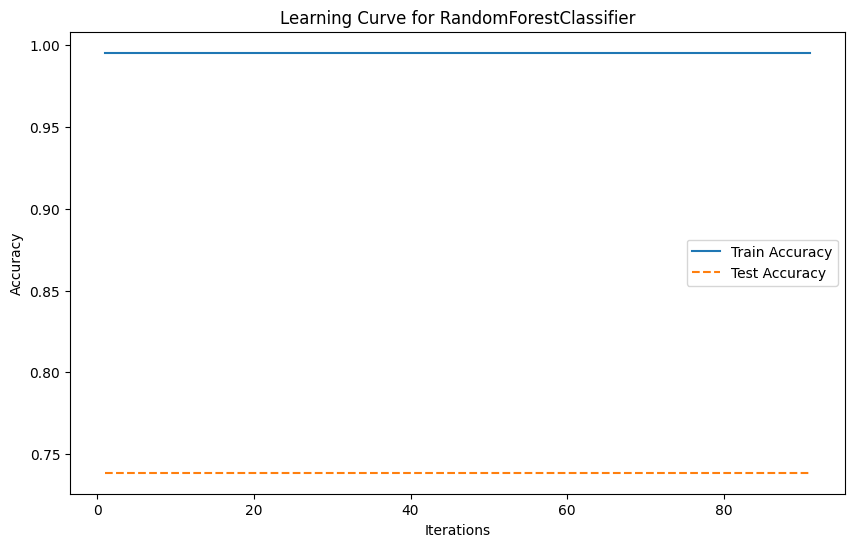

In [14]:
#vẽ cho randomforest
plot_learning_curves(rf,x_train,y_train,x_test,y_test)

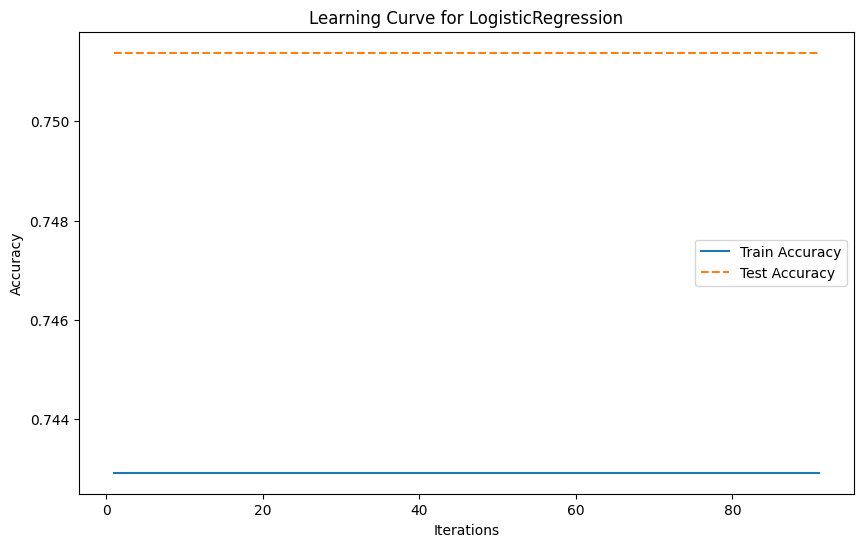

In [15]:
#vẽ cho logistic regression
plot_learning_curves(lg,x_train,y_train,x_test,y_test)

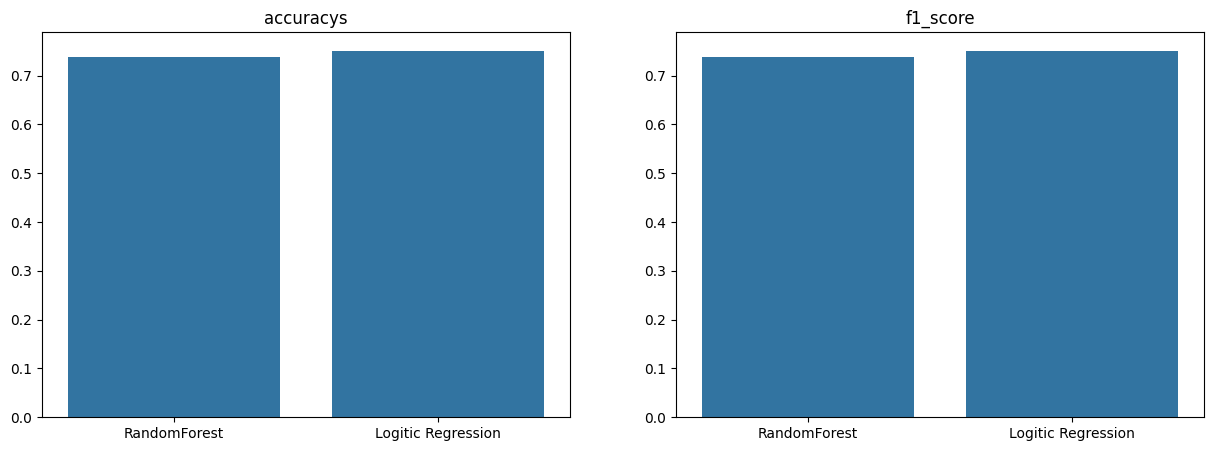

In [12]:
#comparing the accuracy of 2 models
import seaborn as sns
models=['RandomForest','Logitic Regression']
preds=[yRF_pred,yLG_pred]
accuracys=[]
f1=[]
for i in preds:
    accuracys.append( accuracy_score(y_test, i))
    f1.append(f1_score(y_test, i, average="weighted"))
fig,ax = plt.subplots(1,2,figsize=(15,5))
sns.barplot(x=models, y=accuracys, ax=ax[0]).set_title('accuracys')
sns.barplot(x=models, y=f1, ax=ax[1]).set_title('f1_score')
plt.savefig('../../results/img/compare_with_db01.png',dpi=300, bbox_inches='tight')
plt.show()

In [21]:
import joblib

In [14]:
#save model RF

joblib.dump(rf, '../../results/output_files/RFmodel_db01.pkl')

['../../results/output_files/RFmodel_db01.pkl']

In [1]:
#save model Logictic
joblib.dump(lg, '../../results/output_files/LGmodel_db01.pkl')

['../../results/output_files/LGmodel_db01.pkl']

In [22]:
#save model stacking
joblib.dump(stacking_clf, '../../results/output_files/Stackingmodel_db01.pkl')

['../../results/output_files/Stackingmodel_db01.pkl']

confunsion_matrix là matrix cho thấy dự đoán đúng sai theo từng nhãn như ví dụ trên thì ở  predict 0: thì đúng 4738(0) sai là 1985(1)
còn với 1 đúng là 5464(0) sai 1625(1)